# 1. Imports

In [152]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression



In [13]:
final_df = pd.read_pickle('Final_Data/final_features_scores.pkl')
final_df.head()
final_df.columns

Index(['id', 'electoral_term', 'session', 'first_name', 'document_url',
       'last_name', 'faction_id', 'position_short', 'position_long',
       'politician_id', 'top_item', 'top_title', 'speech_content', 'date',
       'faction', 'year', 'speech_length', 'age', 'gender', 'tenure', 'topic',
       'main_category', 'sub_category', 'Stadt', 'Former Country',
       'City Classification', 'net_sentiment_score', 'positivity_sentiment',
       'negativity_sentiment', 'polarizing'],
      dtype='object')

# 2. Total Development

## 2.1 Monthly

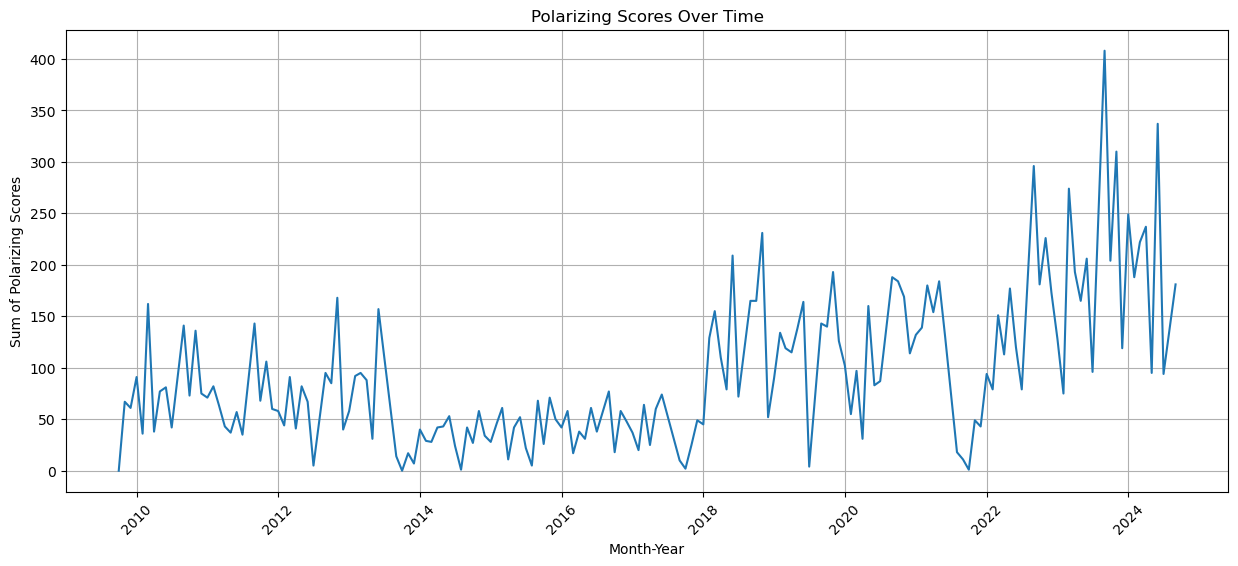

In [58]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['month_year'] = final_df['date'].dt.to_period('M')

final_df['date'] = pd.to_datetime(final_df['date'])
final_df['week_year'] = final_df['date'].dt.to_period('W')

# Group by 'month_year', sum 'polarizing' and 'speech_length', and calculate frequency
monthly_grouped = final_df.groupby('month_year').agg({'polarizing': 'sum'})
monthly_grouped['polarizing']= monthly_grouped['polarizing'].astype('int')

# Reset index for plotting
monthly_grouped = monthly_grouped.reset_index()
monthly_grouped['month_year'] = monthly_grouped['month_year'].dt.to_timestamp()

# Plotting using seaborn for a cleaner and prettier output
plt.figure(figsize=(15, 6))
sns.lineplot(x='month_year', y='polarizing', data=monthly_grouped)
plt.title('Polarizing Scores Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Sum of Polarizing Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [60]:
top_5_month = monthly_grouped.nlargest(5, 'polarizing')
top_5_month

,month_year,polarizing
153,2023-09-01,408
162,2024-06-01,337
155,2023-11-01,310
142,2022-09-01,296
148,2023-03-01,274


## 2.2. Weekly

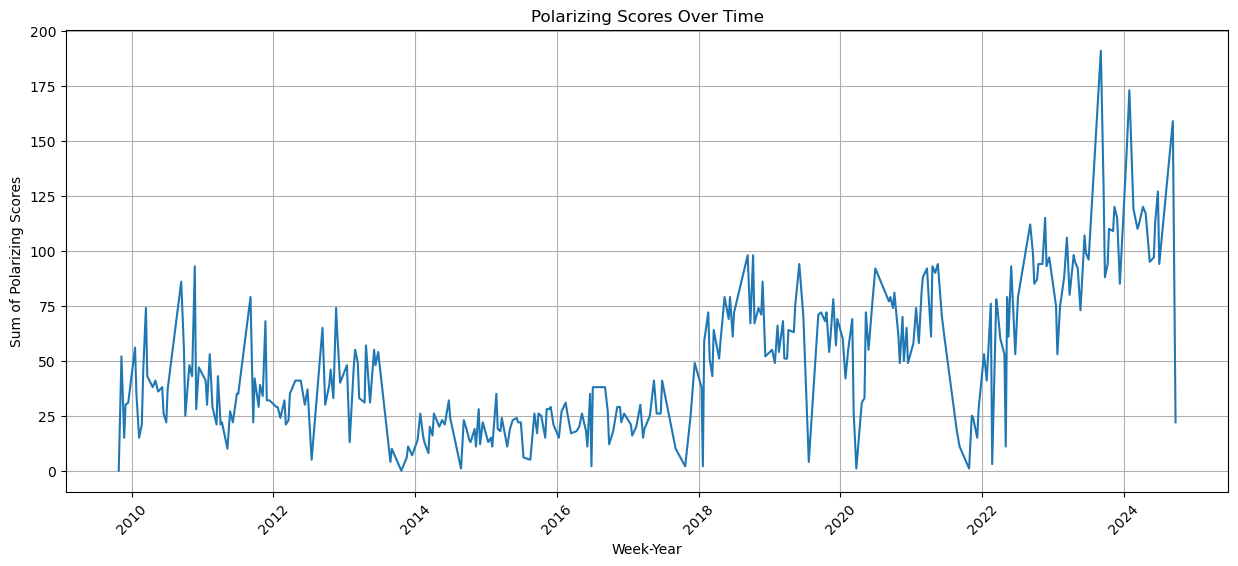

In [54]:
# Group by 'month_year', sum 'polarizing' and 'speech_length', and calculate frequency
weekly_grouped = final_df.groupby('week_year').agg({'polarizing': 'sum'})

# convert polarizing to int
weekly_grouped['polarizing']=weekly_grouped['polarizing'].astype('int')

# Reset index for plotting
weekly_grouped = weekly_grouped.reset_index()
weekly_grouped['week_year'] = weekly_grouped['week_year'].dt.to_timestamp()

# Plotting using seaborn for a cleaner and prettier output
plt.figure(figsize=(15, 6))
sns.lineplot(x='week_year', y='polarizing', data=weekly_grouped)
plt.title('Polarizing Scores Over Time')
plt.xlabel('Week-Year')
plt.ylabel('Sum of Polarizing Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [57]:
top_5_weeks = weekly_grouped.nlargest(5, 'polarizing')
top_5_weeks

,week_year,polarizing
292,2023-09-04,191
302,2024-01-29,173
313,2024-09-09,159
301,2024-01-15,145
293,2023-09-18,129


## 2.3 Daily

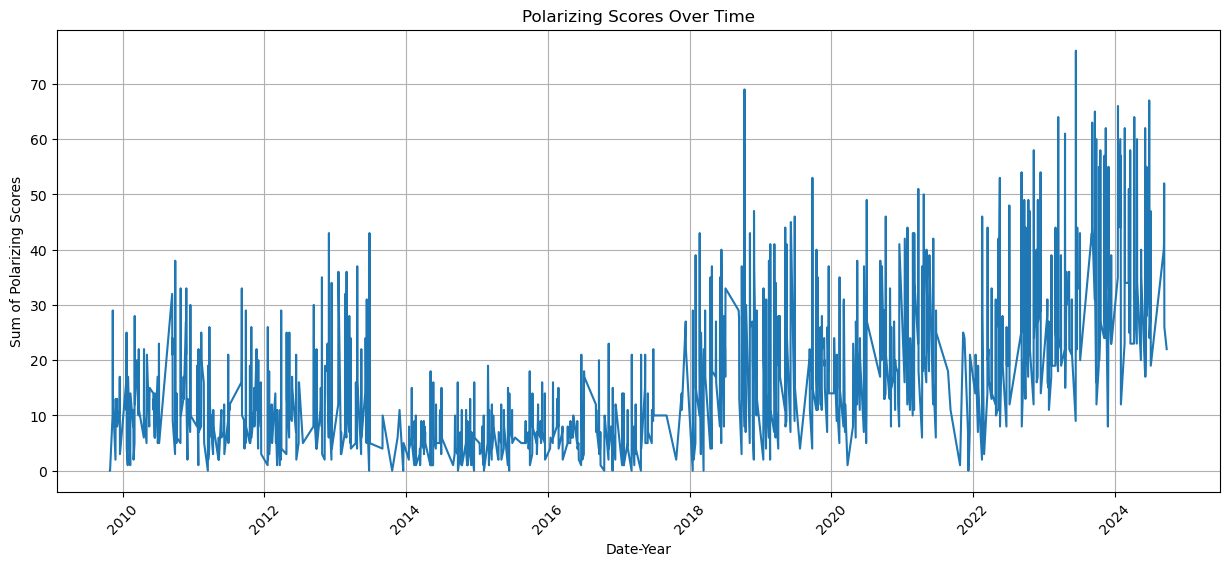

In [61]:
# Group by 'month_year', sum 'polarizing' and 'speech_length', and calculate frequency
daily_grouped = final_df.groupby('date').agg({'polarizing': 'sum'})
daily_grouped['polarizing']=daily_grouped['polarizing'].astype('int')

# Reset index for plotting
daily_grouped = daily_grouped.reset_index()

# Plotting using seaborn for a cleaner and prettier output
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='polarizing', data=daily_grouped)
plt.title('Polarizing Scores Over Time')
plt.xlabel('Date-Year')
plt.ylabel('Sum of Polarizing Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [62]:
top_5_days = daily_grouped.nlargest(5, 'polarizing')
top_5_days

,date,polarizing
842,2023-06-15,76
549,2018-10-11,69
911,2024-06-27,67
880,2024-01-18,66
855,2023-09-21,65


## 2.4 Rolling Average

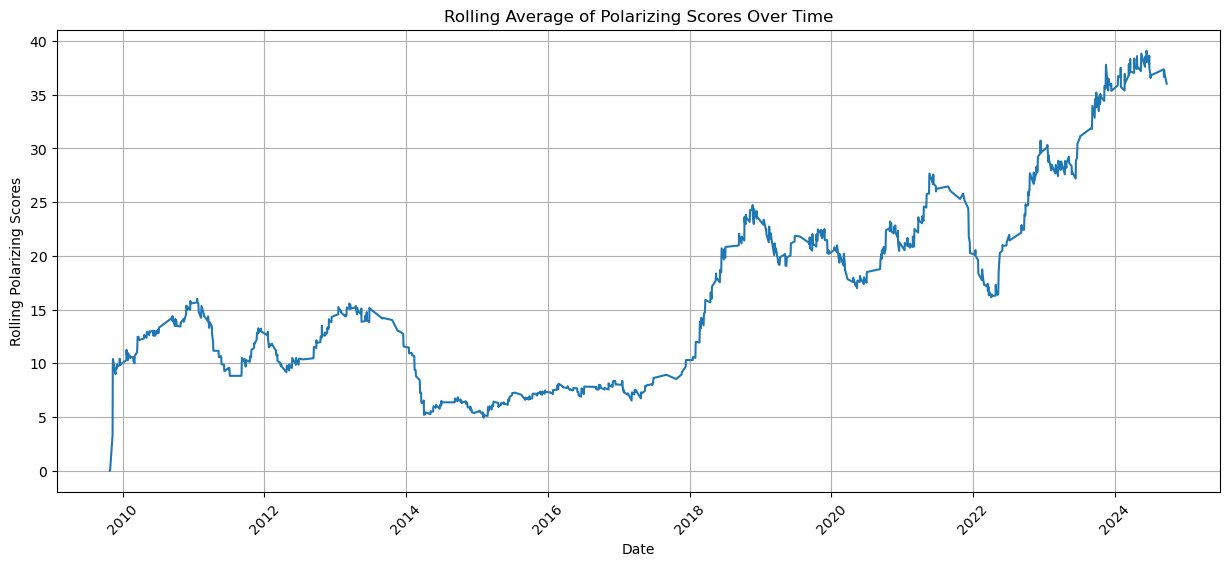

In [37]:
# Group by 'date', sum 'polarizing' and 'speech_length', and calculate frequency
daily_grouped = final_df.groupby('date').agg({'polarizing': 'sum'})

# Applying a 30-day rolling average for smoothing
daily_grouped['rolling_totals'] = daily_grouped['polarizing'].rolling(window=30, min_periods=1).mean()

# Resetting index for plotting
daily_grouped = daily_grouped.reset_index()

# Plotting using seaborn for a cleaner and prettier output with rolling average
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='rolling_totals', data=daily_grouped)
plt.title('Rolling Average of Polarizing Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Polarizing Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Frequency Total Development

## 3.1 Monthly

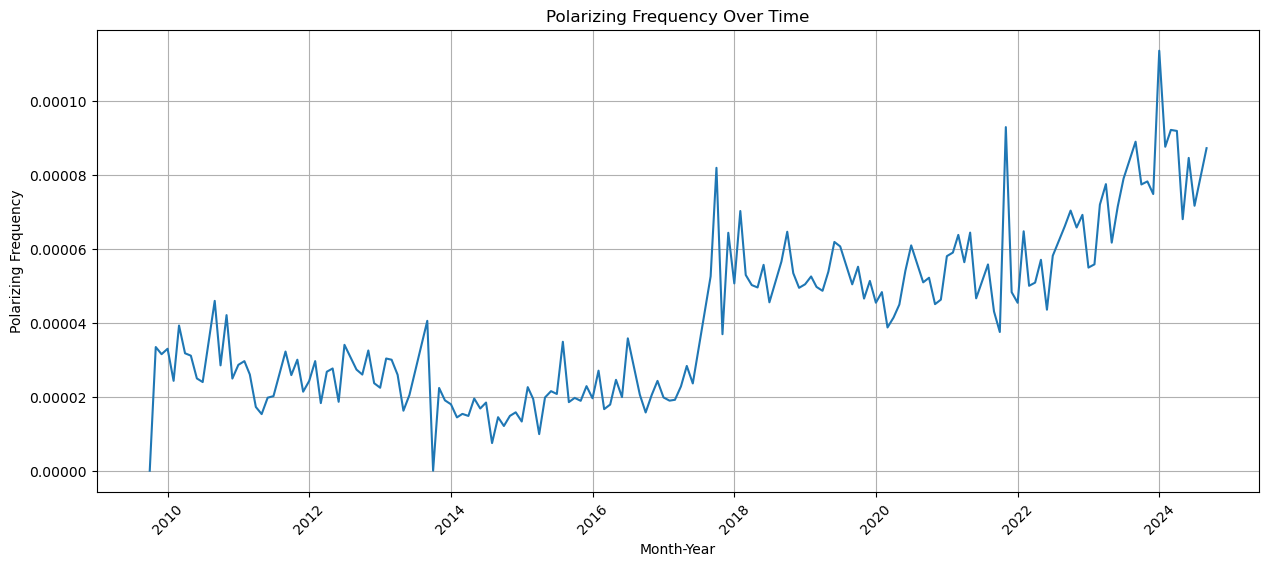

In [67]:
# Group by 'month_year', sum 'polarizing' and 'speech_length', and calculate frequency
monthly_grouped  = final_df.groupby('month_year').agg({'polarizing': 'sum', 'speech_length': 'sum'})
monthly_grouped['frequency'] = monthly_grouped['polarizing'] / monthly_grouped['speech_length']
monthly_grouped['frequency'] = monthly_grouped['frequency'].astype('float')

# Reset index for plotting
monthly_grouped = monthly_grouped.reset_index()
monthly_grouped['month_year'] = monthly_grouped['month_year'].dt.to_timestamp()

# Plotting using seaborn for a cleaner and prettier output
plt.figure(figsize=(15, 6))
sns.lineplot(x='month_year', y='frequency', data=monthly_grouped)
plt.title('Polarizing Frequency Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Polarizing Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [69]:
top_5_month_frequency = monthly_grouped.nlargest(5, 'frequency')
top_5_month_frequency

,month_year,polarizing,speech_length,frequency
157,2024-01-01,249,2190993,0.000114
133,2021-11-01,49,527024,0.000093
159,2024-03-01,222,2407347,0.000092
160,2024-04-01,237,2577670,0.000092
153,2023-09-01,408,4582586,0.000089


## 3.2 Weekly Frequency

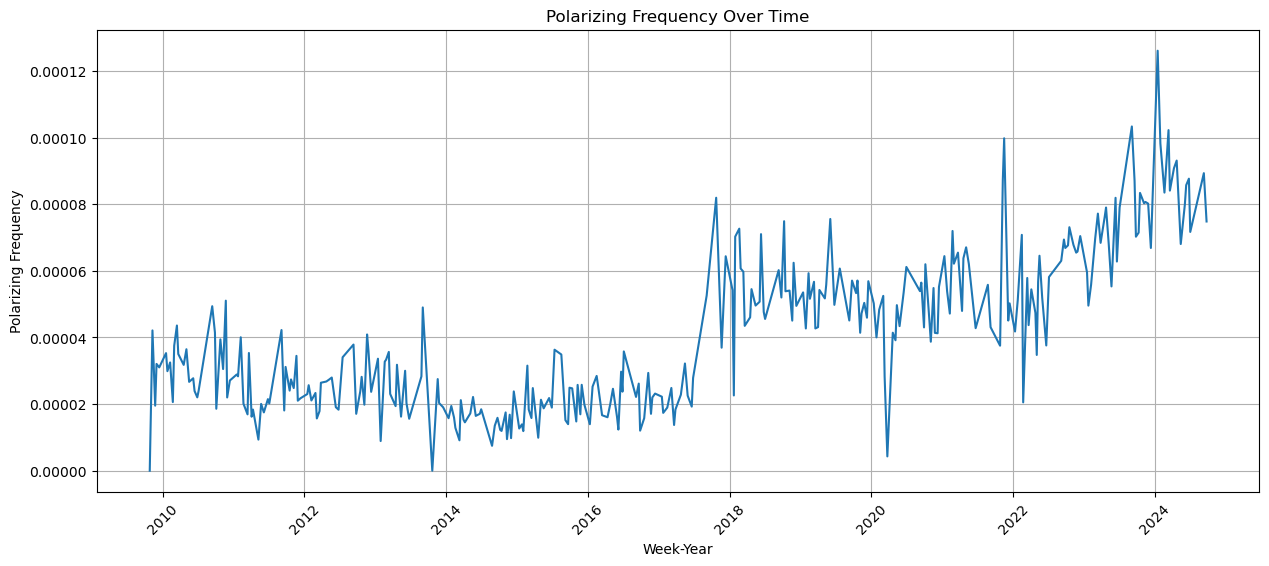

In [70]:
# Group by 'month_year', sum 'polarizing' and 'speech_length', and calculate frequency
weekly_grouped = final_df.groupby('week_year').agg({'polarizing': 'sum', 'speech_length': 'sum'})
weekly_grouped['frequency'] = weekly_grouped['polarizing'] / weekly_grouped['speech_length']
weekly_grouped['frequency'] =weekly_grouped['frequency'].astype('float')

# Reset index for plotting
weekly_grouped = weekly_grouped.reset_index()
weekly_grouped['week_year'] = weekly_grouped['week_year'].dt.to_timestamp()

# Plotting using seaborn for a cleaner and prettier output
plt.figure(figsize=(15, 6))
sns.lineplot(x='week_year', y='frequency', data=weekly_grouped)
plt.title('Polarizing Frequency Over Time')
plt.xlabel('Week-Year')
plt.ylabel('Polarizing Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [73]:
top_5_weekly_frequency = weekly_grouped.nlargest(5, 'frequency')
top_5_weekly_frequency

,week_year,polarizing,speech_length,frequency
301,2024-01-15,145,1149884,0.000126
292,2023-09-04,191,1847912,0.000103
304,2024-03-11,110,1075658,0.000102
253,2021-11-15,24,240455,0.000100
302,2024-01-29,173,1760782,0.000098


## 3.3 Daily Frequency

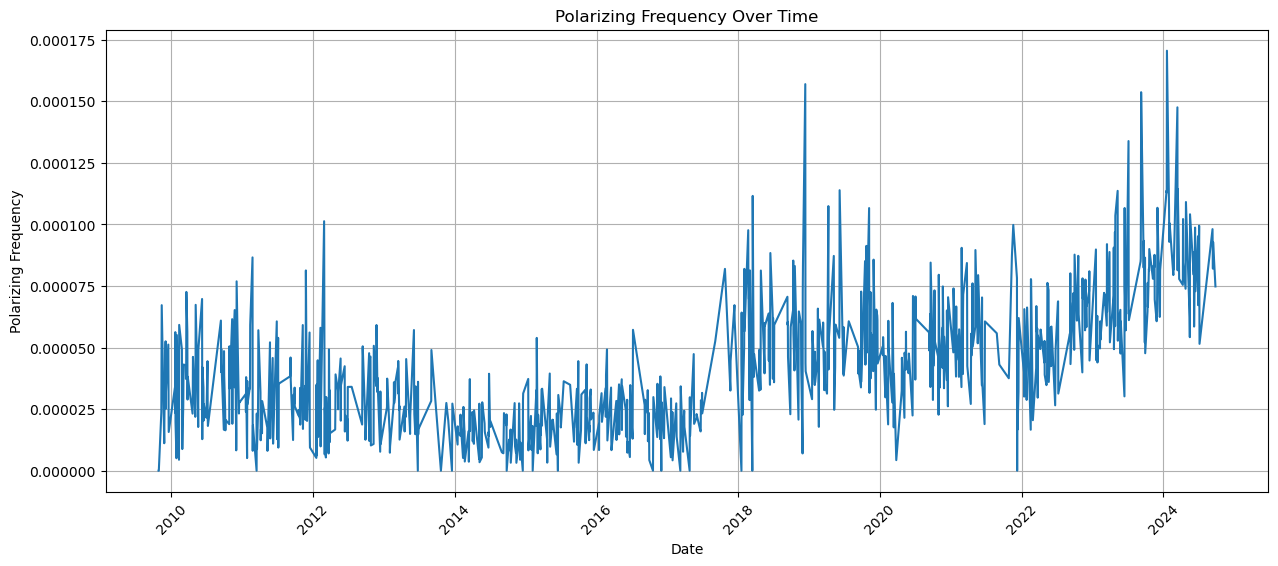

In [75]:
# Group by 'month_year', sum 'polarizing' and 'speech_length', and calculate frequency
daily_grouped = final_df.groupby('date').agg({'polarizing': 'sum', 'speech_length': 'sum'})
daily_grouped['frequency'] = daily_grouped['polarizing'] / daily_grouped['speech_length']
daily_grouped['frequency'] =daily_grouped['frequency'].astype('float')

# Reset index for plotting
daily_grouped = daily_grouped.reset_index()

# Plotting using seaborn for a cleaner and prettier output
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='frequency', data=daily_grouped)
plt.title('Polarizing Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Polarizing Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [77]:
top_5_daily_frequency = daily_grouped.nlargest(5, 'frequency')
top_5_daily_frequency

,date,polarizing,speech_length,frequency
881,2024-01-19,44,257987,0.000171
564,2018-12-12,10,63703,0.000157
853,2023-09-08,44,286259,0.000154
889,2024-03-13,34,230421,0.000148
847,2023-07-05,33,246525,0.000134


## 3.4 Rolling Average

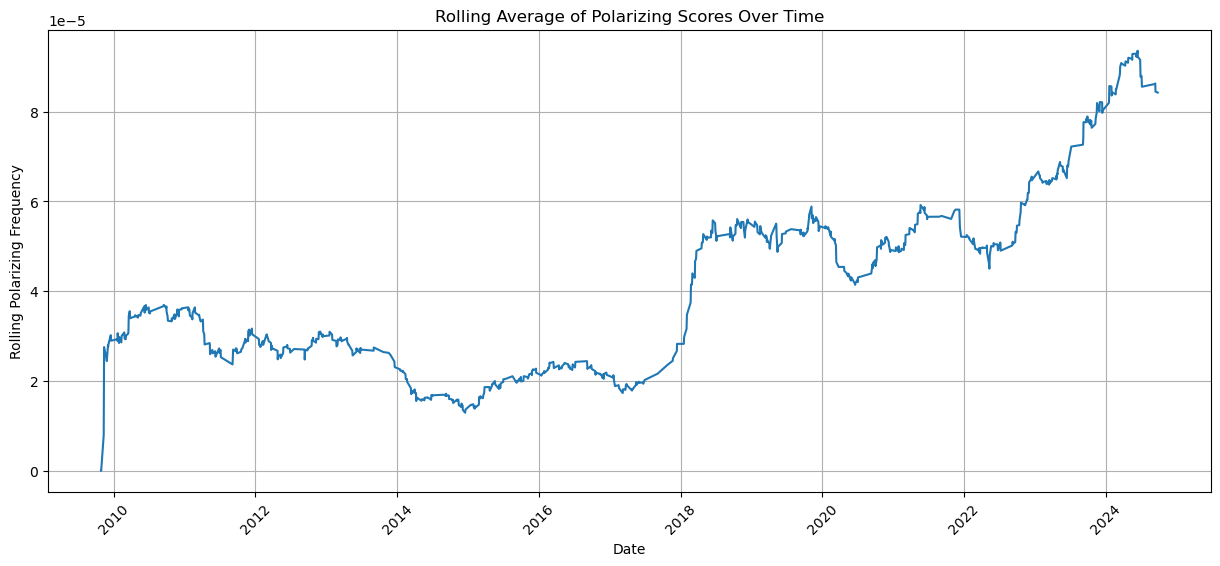

In [78]:
# Applying a 30-day rolling average for smoothing
daily_grouped['rolling_frequency_30'] = daily_grouped['frequency'].rolling(window=30, min_periods=1).mean()

# Resetting index for plotting
daily_grouped = daily_grouped.reset_index()

# Plotting using seaborn for a cleaner and prettier output with rolling average
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='rolling_frequency_30', data=daily_grouped)
plt.title('Rolling Average of Polarizing Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Polarizing Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Extreme Events

## 4.1 Europe

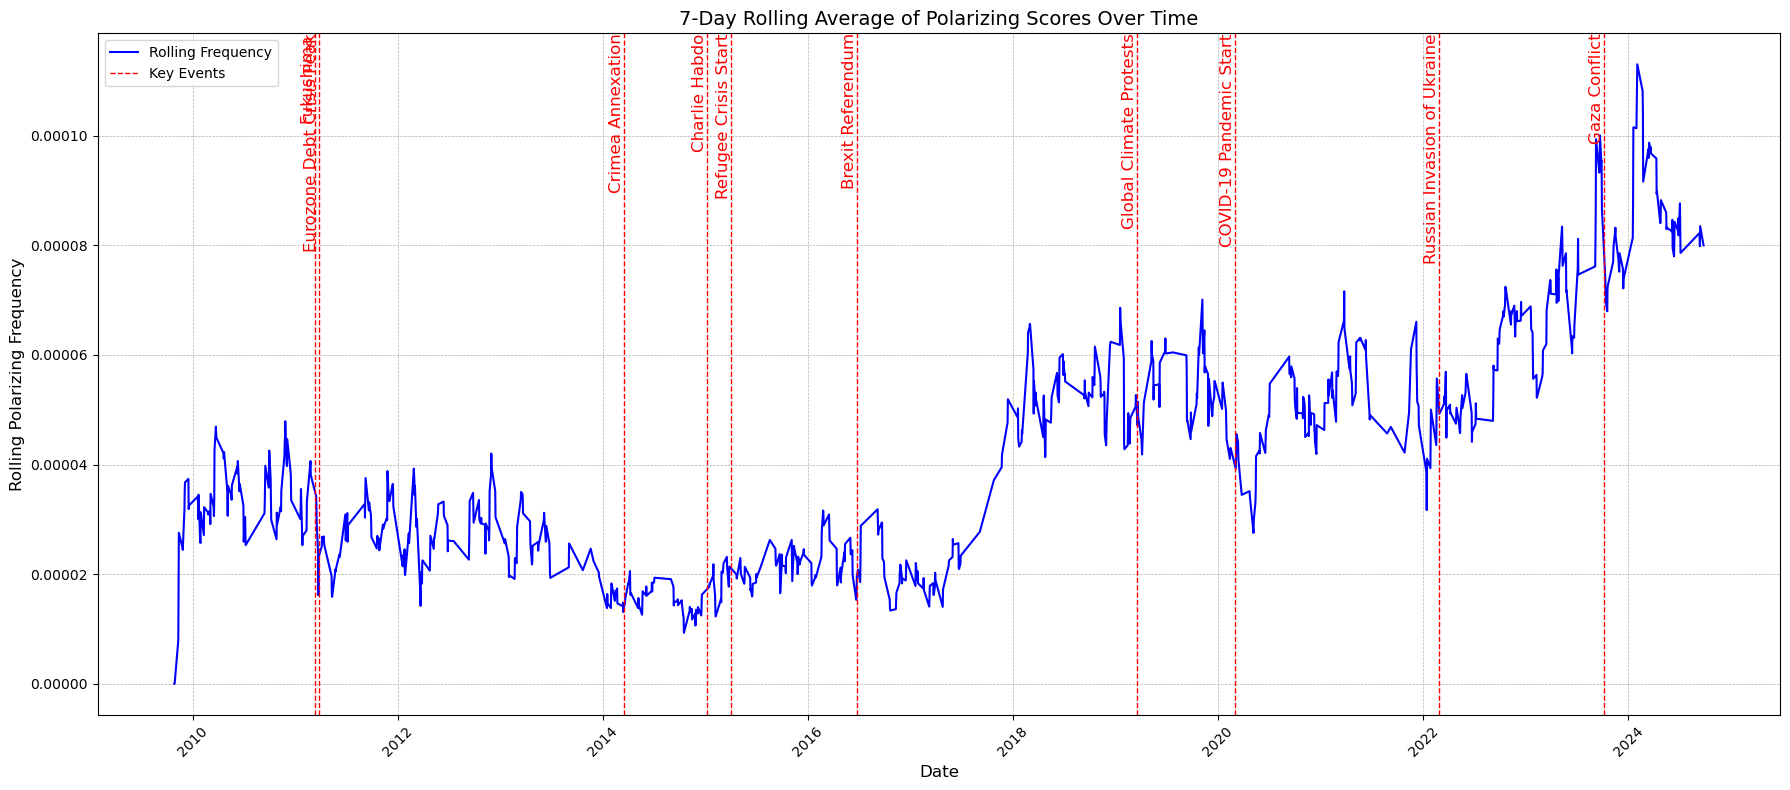

In [171]:
# Calculate the 7-day rolling average
daily_grouped['rolling_frequency_7'] = daily_grouped['frequency'].rolling(window=7, min_periods=1).mean()

# Key event dates
events = {
    'Eurozone Debt Crisis Peak': '2011-03-25',
    'Crimea Annexation': '2014-03-18',
    'Refugee Crisis Start': '2015-04-01',
    'Global Climate Protests': '2019-03-18',
    'COVID-19 Pandemic Start': '2020-03-01',
    'Gaza Conflict': '2023-10-07',
    'Brexit Referendum': '2016-06-23',
    'Russian Invasion of Ukraine':'2022-02-24',
    'Charlie Habdo': '2015-01-07',
    'Fukushima': '2011-03-11'
}

# Plotting
plt.figure(figsize=(18, 8))  # Increased figure size for better legibility
ax = sns.lineplot(x='date', y='rolling_frequency_7', data=daily_grouped, color='blue', linewidth=1.5)

# Add vertical lines and labels for key events
for event, date in events.items():
    event_date = pd.to_datetime(date)
    ax.axvline(event_date, color='red', linestyle='--', lw=1)
    plt.text(event_date, ax.get_ylim()[1], event, rotation=90, ha='right', va='top', color='red', fontsize=12)

# Improve plot aesthetics
plt.title('7-Day Rolling Average of Polarizing Scores Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Polarizing Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

# Adding a legend for clarity
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='blue', lw=1.5, label='Rolling Frequency'),
                   Line2D([0], [0], color='red', linestyle='--', lw=1, label='Key Events')]
ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()  # Adjusts plot parameters for better fit
plt.show()


## 4.2 Germany

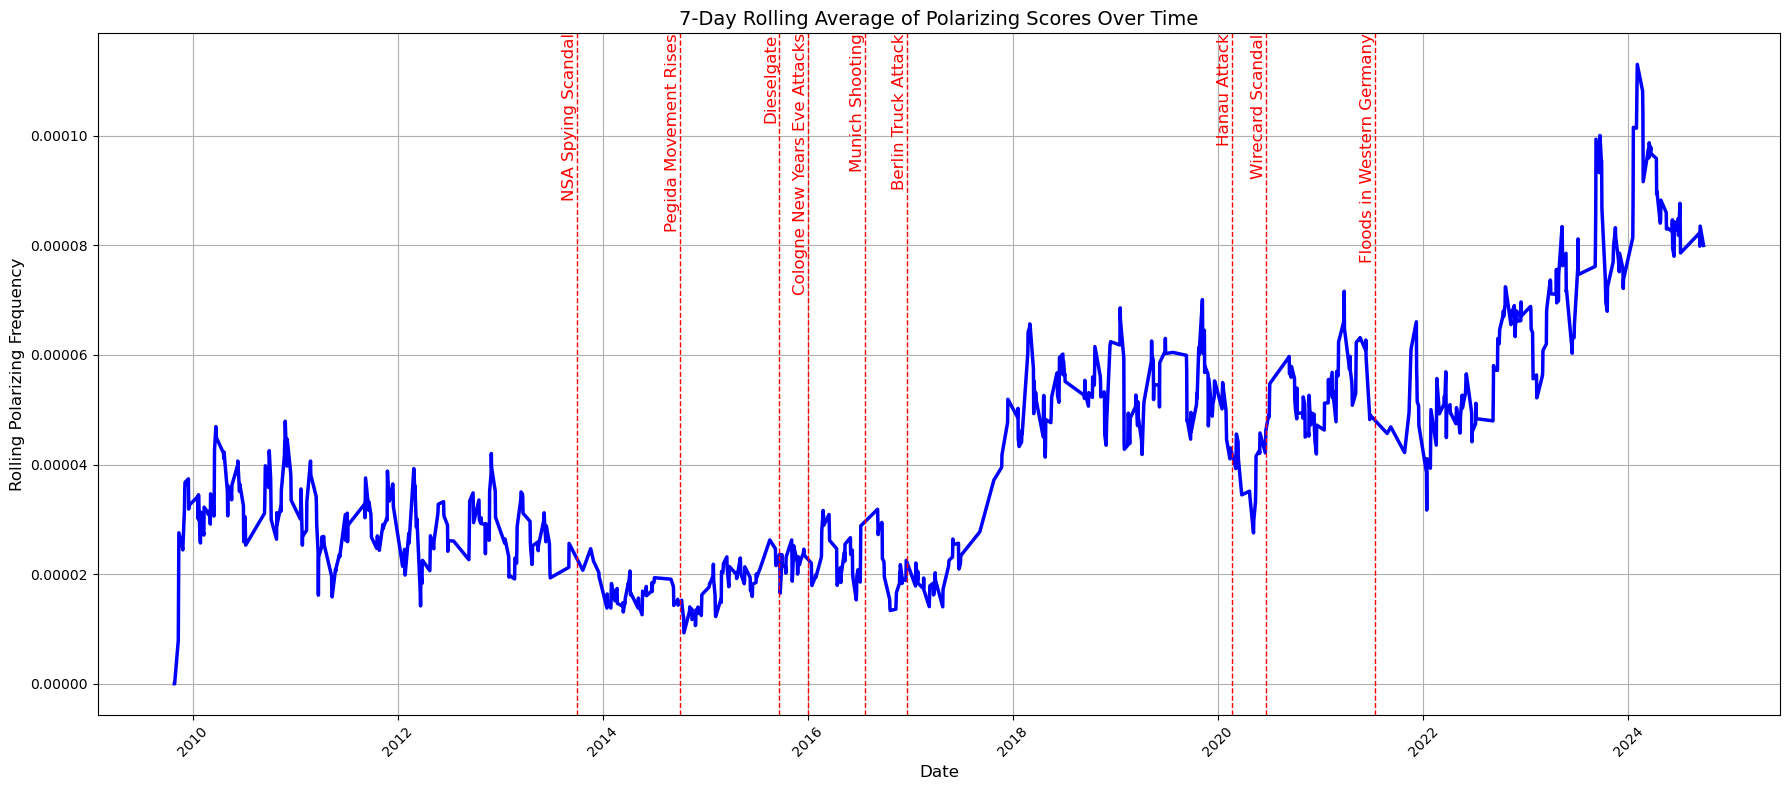

In [174]:
german_events = {
    'Berlin Truck Attack': '2016-12-19',
    'Hanau Attack': '2020-02-19',
    'Munich Shooting': '2016-07-22',
    'Cologne New Years Eve Attacks': '2015-12-31',
    'Floods in Western Germany': '2021-07-14',
    'Wirecard Scandal': '2020-06-18',
    'Dieselgate': '2015-09-18',
    'NSA Spying Scandal': '2013-10-01',
    'Pegida Movement Rises': '2014-10-01'
}



# Plotting
plt.figure(figsize=(18, 8))
ax = sns.lineplot(x='date', y='rolling_frequency_7', data=daily_grouped, color='blue', linewidth=2.5)

# Add vertical lines for key events and German specific events
for event, date in german_events.items():
    date = pd.to_datetime(date)
    ax.axvline(date, color='red', linestyle='--', lw=1)
    plt.text(date, ax.get_ylim()[1], event, rotation=90, ha='right', va='top', color='red', fontsize=12)

# Plot adjustments
plt.title('7-Day Rolling Average of Polarizing Scores Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Polarizing Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()  # Adjust subplots to give some padding and prevent overlap
plt.show()

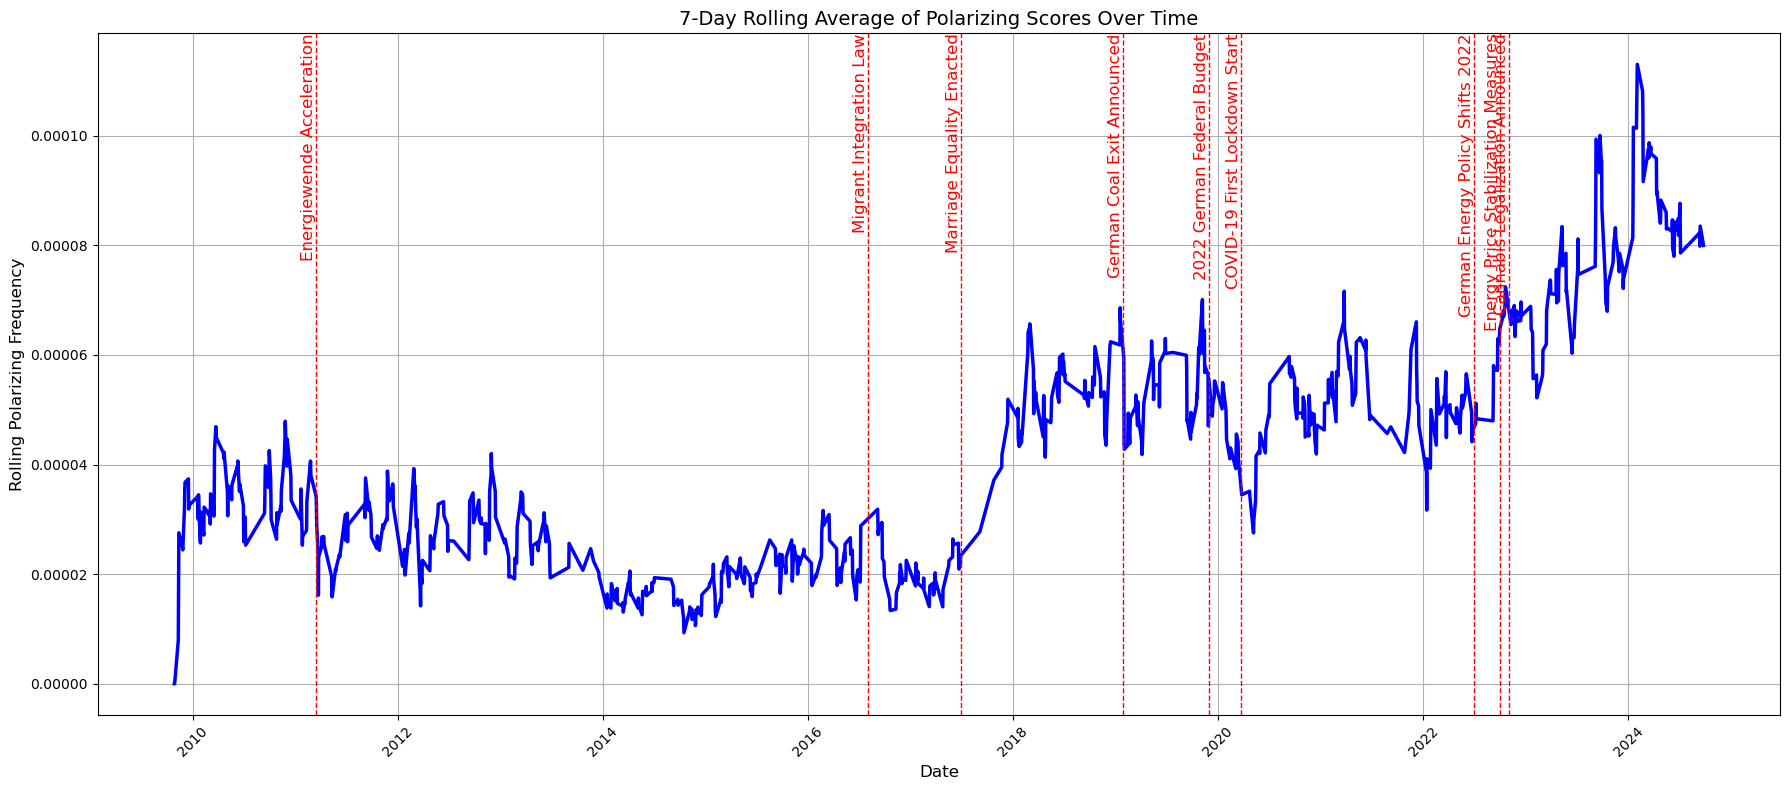

In [175]:
german_policies = {
    'Migrant Integration Law': '2016-08-01',
    'Marriage Equality Enacted': '2017-06-30',
    'German Coal Exit Announced': '2019-01-26',
    'COVID-19 First Lockdown Start': '2020-03-22',
    'German Energy Policy Shifts 2022': '2022-07-01',
    '2022 German Federal Budget': '2019-12-01',
    'Energiewende Acceleration': '2011-03-15',
    'Energy Price Stabilization Measures': '2022-10-01',
    'Cannabis Legalization Announced': '2022-11-01'
}

# Plotting
plt.figure(figsize=(18, 8))
ax = sns.lineplot(x='date', y='rolling_frequency_7', data=daily_grouped, color='blue', linewidth=2.5)

# Add vertical lines for key events and German specific events
for event, date in german_policies.items():
    date = pd.to_datetime(date)
    ax.axvline(date, color='red', linestyle='--', lw=1)
    plt.text(date, ax.get_ylim()[1], event, rotation=90, ha='right', va='top', color='red', fontsize=12)

# Plot adjustments
plt.title('7-Day Rolling Average of Polarizing Scores Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Polarizing Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()  # Adjust subplots to give some padding and prevent overlap
plt.show()

## 4.3 Measured Polarization Changes

In [178]:
event_change = final_df.copy()
event_change['date'] = pd.to_datetime(event_change['date'])
event_change.set_index('date', inplace=True)  # Ensure the index is datetime


# Function to calculate polarization around dates
def analyze_impact(dates_dict):
    results = []
    for name, date_str in dates_dict.items():
        date = pd.to_datetime(date_str)
        pre_period = (date - pd.DateOffset(weeks=3), date)
        event_period = (date, date + pd.DateOffset(weeks=2))
        post_period = (date + pd.DateOffset(weeks=2), date + pd.DateOffset(weeks=3))
        
        pre_avg = event_change.loc[pre_period[0]:pre_period[1], 'frequency'].mean()
        during_avg = event_change.loc[event_period[0]:event_period[1], 'frequency'].mean()
        post_avg = event_change.loc[post_period[0]:post_period[1], 'frequency'].mean()
        
        results.append({
            'Event': name,
            'Pre-Event Avg Polarization': pre_avg,
            'During Event Avg Polarization': during_avg,
            'Post-Event Avg Polarization': post_avg
        })
    
    return pd.DataFrame(results)

# Analyzing events and policies
event_impacts = analyze_impact(german_events)
policy_impacts = analyze_impact(german_policies)

# Display the results
print("Event Impacts on Polarization:")
print(event_impacts)
print("\nPolicy Impacts on Polarization:")
print(policy_impacts)


Event Impacts on Polarization:
                           Event  Pre-Event Avg Polarization  \
0            Berlin Truck Attack                    0.000043   
1                   Hanau Attack                    0.000070   
2                Munich Shooting                    0.000039   
3  Cologne New Years Eve Attacks                    0.000045   
4      Floods in Western Germany                    0.000072   
5               Wirecard Scandal                    0.000094   
6                     Dieselgate                    0.000061   
7             NSA Spying Scandal                         NaN   
8          Pegida Movement Rises                    0.000048   

   During Event Avg Polarization  Post-Event Avg Polarization  
0                            NaN                          NaN  
1                       0.000024                     0.000105  
2                            NaN                          NaN  
3                       0.000017                     0.000039  
4       

## 4.4 Most significant changes

Daily

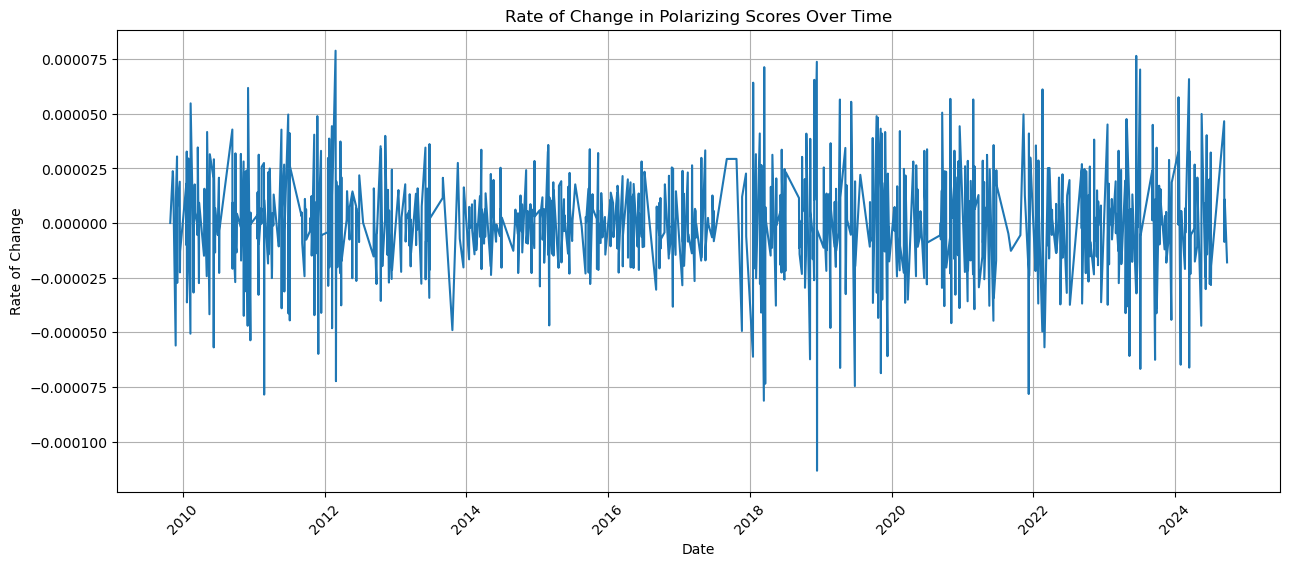

Top 10 Rises in Polarizing Scores:
          date  rate_of_change
158 2012-02-27        0.000079
842 2023-06-15        0.000076
564 2018-12-12        0.000074
515 2018-03-16        0.000071
847 2023-07-05        0.000070
889 2024-03-13        0.000066
562 2018-11-29        0.000066
501 2018-01-18        0.000064
77  2010-12-03        0.000062
750 2022-02-17        0.000061

Bottom 10 Falls in Polarizing Scores:
          date  rate_of_change
848 2023-07-06       -0.000067
618 2019-11-07       -0.000069
159 2012-02-29       -0.000072
516 2018-03-21       -0.000074
600 2019-06-26       -0.000075
738 2021-12-08       -0.000078
91  2011-02-24       -0.000079
513 2018-03-14       -0.000081
565 2018-12-13       -0.000113
0   2009-10-27             NaN


In [124]:
# Calculate the rate of change in polarizing scores
daily_grouped['rate_of_change'] = daily_grouped['frequency'].diff()

# Sorting the DataFrame by the rate of change to find significant changes
sorted_changes = daily_grouped.sort_values(by='rate_of_change', ascending=False)

# Select the top 5 rises and bottom 5 falls in polarizing scores
top_5_rises = sorted_changes.head(10)
bottom_5_falls = sorted_changes.tail(10)

# Plotting the rate of change
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='rate_of_change', data=daily_grouped)
plt.title('Rate of Change in Polarizing Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Rate of Change')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Displaying th

print("Top 10 Rises in Polarizing Scores:")
print(top_5_rises[['date', 'rate_of_change']])
print("\nBottom 10 Falls in Polarizing Scores:")
print(bottom_5_falls[['date', 'rate_of_change']])

Weekly

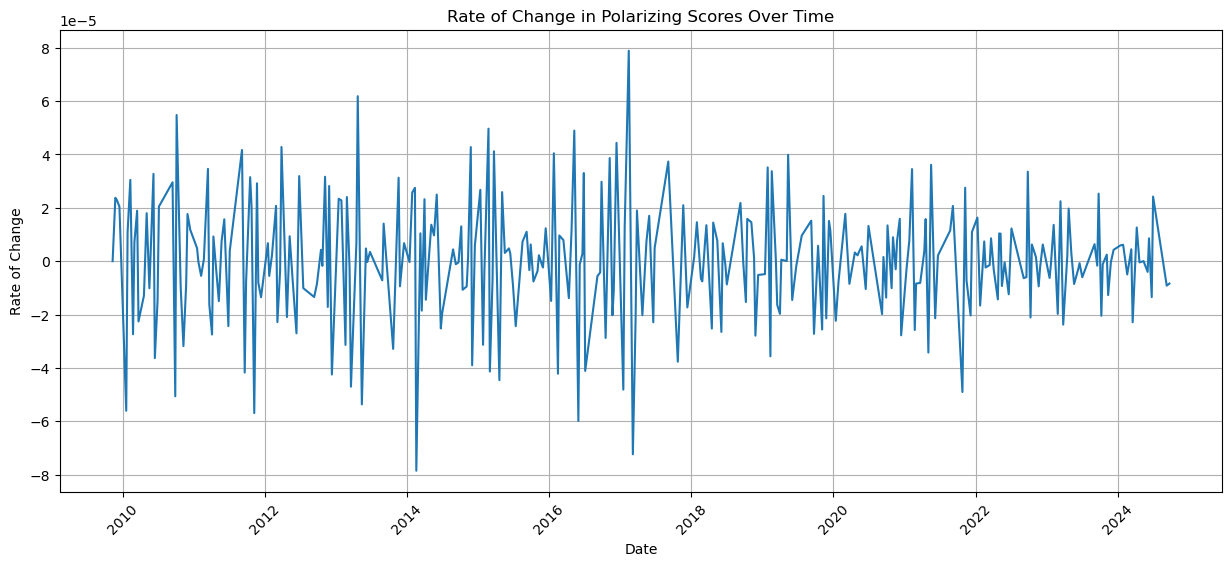

Top 10 Rises in Polarizing Scores:
     week_year  rate_of_change
158 2017-02-13        0.000079
77  2013-04-22        0.000062
21  2010-10-04        0.000055
114 2015-02-23        0.000050
142 2016-05-09        0.000049
155 2016-12-12        0.000044
55  2012-03-26        0.000043
108 2014-11-24        0.000043
40  2011-09-05        0.000042
117 2015-03-23        0.000041

Bottom 10 Falls in Polarizing Scores:
     week_year  rate_of_change
156 2017-01-16       -0.000048
251 2021-10-25       -0.000049
20  2010-09-27       -0.000051
78  2013-05-13       -0.000054
5   2010-01-18       -0.000056
45  2011-11-07       -0.000057
143 2016-05-30       -0.000060
159 2017-03-06       -0.000072
91  2014-02-17       -0.000079
0   2009-10-26             NaN


In [127]:
# Calculate the rate of change in polarizing scores
weekly_grouped['rate_of_change'] = daily_grouped['frequency'].diff()

# Sorting the DataFrame by the rate of change to find significant changes
sorted_changes = weekly_grouped.sort_values(by='rate_of_change', ascending=False)

# Select the top 5 rises and bottom 5 falls in polarizing scores
top_5_rises = sorted_changes.head(10)
bottom_5_falls = sorted_changes.tail(10)

# Plotting the rate of change
plt.figure(figsize=(15, 6))
sns.lineplot(x='week_year', y='rate_of_change', data=weekly_grouped)
plt.title('Rate of Change in Polarizing Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Rate of Change')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Displaying th

print("Top 10 Rises in Polarizing Scores:")
print(top_5_rises[['week_year', 'rate_of_change']])
print("\nBottom 10 Falls in Polarizing Scores:")
print(bottom_5_falls[['week_year', 'rate_of_change']])

# 5. Development by Faction

In [100]:
# Adjusting the color map to match the faction names exactly as they appear in the dataset
color_map = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'DIE LINKE.': 'pink',
    'AfD': 'blue',
    'BSW': 'purple',
    'Fraktionslos':'grey'
}

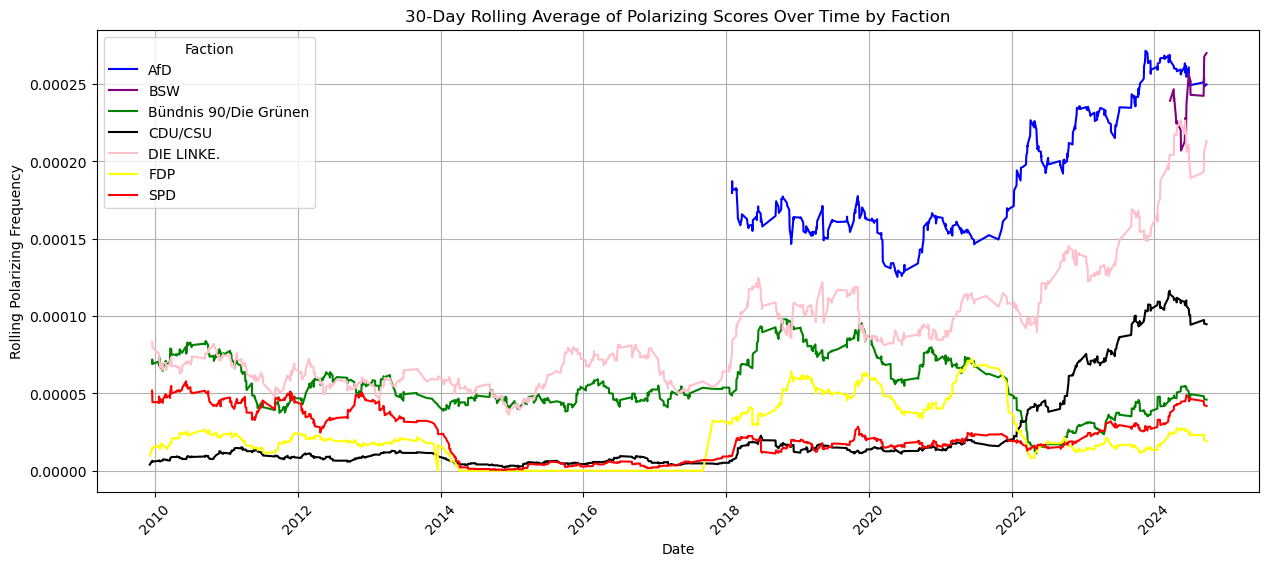

In [107]:

# Filter out 'Fraktionslos' and ensure faction names are correct in the dataframe
filtered_df = final_df[(final_df['faction'] != 'Fraktionslos')]

# Grouping by 'date' and 'faction', then calculating the polarizing frequency
faction_grouped = filtered_df.groupby(['electoral_term', 'date', 'faction']).agg({
    'polarizing': 'sum',
    'speech_length': 'sum'
}).reset_index()  # Resetting the index here
faction_grouped['frequency'] = faction_grouped['polarizing'] / faction_grouped['speech_length']

faction_grouped = faction_grouped.sort_values(by=['faction', 'date'])

# Filter to add zero frequency data for FDP during electoral term 18
if 'FDP' not in faction_grouped[(faction_grouped['electoral_term'] == 18) & (faction_grouped['faction'] == 'FDP')].faction.values:
    # Find the date range for electoral term 18
    term_18_dates = faction_grouped[faction_grouped['electoral_term'] == 18]['date'].unique()
    # Create a DataFrame with zero values for FDP
    fdp_zeros = pd.DataFrame({
        'date': term_18_dates,
        'faction': 'FDP',
        'electoral_term': 18,
        'polarizing': 0,
        'speech_length': 1,  # to avoid division by zero
        'frequency': 0
    })
    # Append to the original DataFrame
    faction_grouped = pd.concat([faction_grouped, fdp_zeros], ignore_index=True)

# Recalculate the rolling_frequency now including the zeroed FDP values for term 18
faction_grouped['date'] = pd.to_datetime(faction_grouped['date'])  # Ensure 'date' is a datetime object
faction_grouped['rolling_frequency_30'] = faction_grouped.groupby('faction')['frequency'].transform(lambda x: x.rolling(window=30, min_periods=10).mean())

# Plotting rolling average of polarizing frequency by faction over time with specified colors
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='rolling_frequency_30', hue='faction', palette=color_map, data=faction_grouped)
plt.title('30-Day Rolling Average of Polarizing Scores Over Time by Faction')
plt.xlabel('Date')
plt.ylabel('Rolling Polarizing Frequency')
plt.xticks(rotation=45)
plt.legend(title='Faction')
plt.grid(True)
plt.show()


Not Frequency but totals:

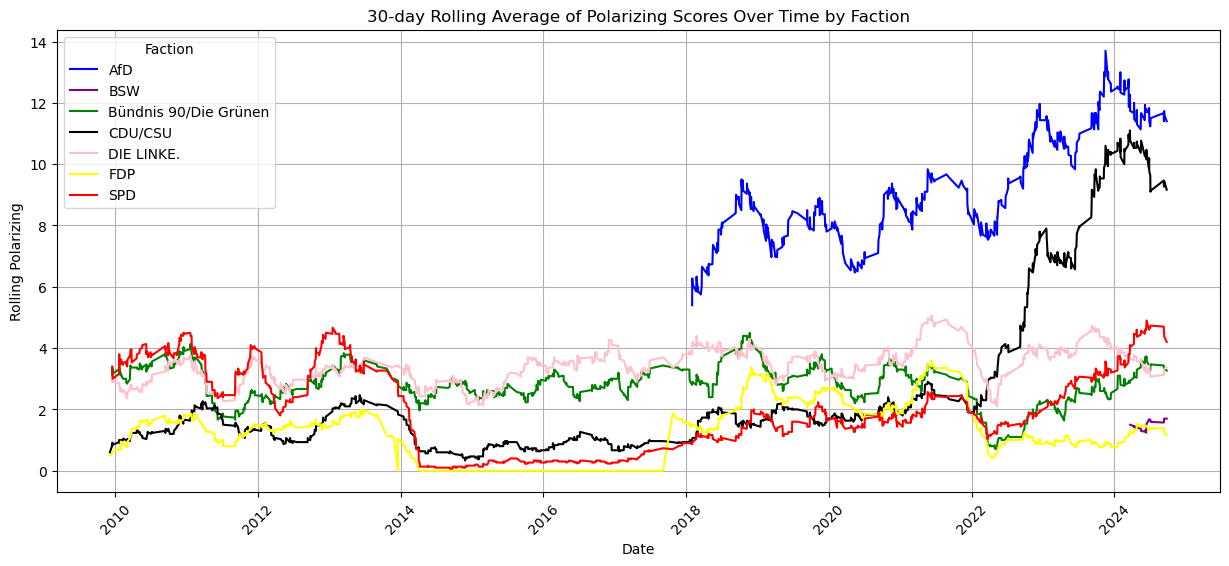

In [130]:
faction_grouped['rolling_polarizing_30'] = faction_grouped.groupby('faction')['polarizing'].transform(
    lambda x: x.rolling(window=30, min_periods=10).mean())


# Ensure 'date' is in datetime format for proper plotting
faction_grouped['date'] = pd.to_datetime(faction_grouped['date'])

# Plotting rolling average of polarizing scores by faction over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='rolling_polarizing_30', hue='faction', palette=color_map, data=faction_grouped)
plt.title('30-day Rolling Average of Polarizing Scores Over Time by Faction')
plt.xlabel('Date')
plt.ylabel('Rolling Polarizing')
plt.xticks(rotation=45)
plt.legend(title='Faction')
plt.grid(True)
plt.show()

Percentage change per electoral term per faction

In [120]:
final_df['speech_length'].replace(0, np.nan, inplace=True)  # Replace 0 with NaN to avoid division by zero

# Perform the division safely
final_df['frequency'] = final_df['polarizing'] / final_df['speech_length']

# Fill NaN values in 'frequency' if there were any zeros in 'speech_length'
final_df['frequency'].fillna(0, inplace=True)  # Assuming you want to treat these as zero frequency

# Continue with your grouping and calculations
avg_freq_per_term_faction = final_df.groupby(['electoral_term', 'faction'])['frequency'].mean().reset_index()
pivot_avg_freq_faction = avg_freq_per_term_faction.pivot(index='electoral_term', columns='faction', values='frequency')
percentage_change_faction = pivot_avg_freq_faction.pct_change() * 100

# Display the result
print("Average Frequency per Electoral Term by Faction:")
print(pivot_avg_freq_faction)
print("\nPercentage Change from Previous Electoral Term:")
print(percentage_change_faction)

Average Frequency per Electoral Term by Faction:
faction              AfD       BSW  Bündnis 90/Die Grünen   CDU/CSU  \
electoral_term                                                        
17                   NaN       NaN               0.000155  0.000053   
18                   NaN       NaN               0.000105  0.000031   
19              0.000435       NaN               0.000235  0.000065   
20              0.000861  0.000966               0.000177  0.000348   

faction         DIE LINKE.       FDP  Fraktionslos       SPD  
electoral_term                                                
17                0.000140  0.000053      0.000148  0.000185  
18                0.000137       NaN      0.000351  0.000020  
19                0.000222  0.000140      0.000372  0.000119  
20                0.000364  0.000093      0.001704  0.000169  

Percentage Change from Previous Electoral Term:
faction               AfD  BSW  Bündnis 90/Die Grünen     CDU/CSU  DIE LINKE.  \
electoral_term  

# 6. Development by Governmennt vs. Opposition

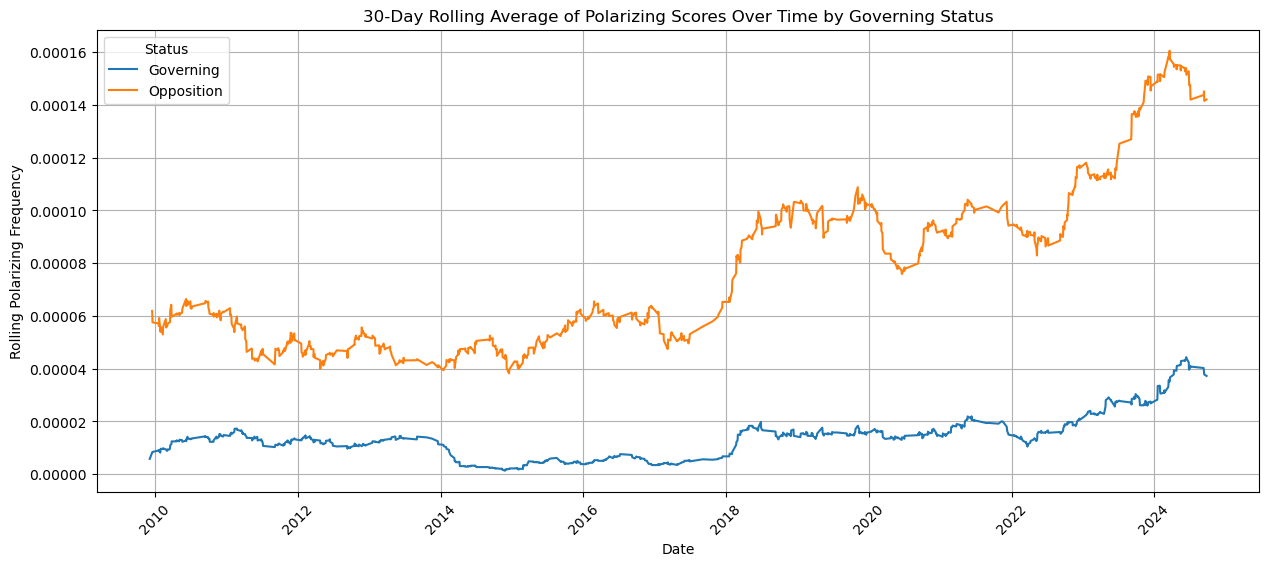

In [119]:
# Assuming 'final_df' is updated to include the 'electoral_term' column
# Define the mapping from electoral terms to governing factions
regierung_mapping = {
    17: ['CDU/CSU', 'FDP'],
    18: ['CDU/CSU', 'SPD'],
    19: ['CDU/CSU', 'SPD'],
    20: ['SPD', 'FDP', 'Bündnis 90/Die Grünen']
}

# Function to assign 'Governing' or 'Opposition' status based on the mapping
def map_governing_faction(row):
    governing_factions = regierung_mapping.get(row['electoral_term'], [])
    return 'Governing' if row['faction'] in governing_factions else 'Opposition'

# Apply the function to create a new 'status' column in final_df
final_df['status'] = final_df.apply(map_governing_faction, axis=1)

# Group by 'date' and 'status', then calculate the polarizing frequency
grouped_by_status = final_df.groupby(['date', 'status']).agg({
    'polarizing': 'sum',
    'speech_length': 'sum'
})
grouped_by_status['frequency'] = grouped_by_status['polarizing'] / grouped_by_status['speech_length']

# Reset index for plotting
grouped_by_status = grouped_by_status.reset_index()
grouped_by_status['date'] = pd.to_datetime(grouped_by_status['date'])

# Applying a 30-day rolling average for smoothing, grouped by status
grouped_by_status['rolling_frequency_30'] = grouped_by_status.groupby('status')['frequency'].transform(lambda x: x.rolling(window=30, min_periods=10).mean())

# Plotting the rolling average of polarizing frequency by governing status over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='rolling_frequency_30', hue='status', data=grouped_by_status)
plt.title('30-Day Rolling Average of Polarizing Scores Over Time by Governing Status')
plt.xlabel('Date')
plt.ylabel('Rolling Polarizing Frequency')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.grid(True)
plt.show()

In [121]:

# Calculate the polarizing frequency
final_df['frequency'] = final_df['polarizing'] / final_df['speech_length']

# Aggregate data to get the average frequency per electoral term and status
avg_freq_per_term_status = final_df.groupby(['electoral_term', 'status'])['frequency'].mean().reset_index()

# Pivot the data to have electoral terms as rows and status as columns
pivot_avg_freq = avg_freq_per_term_status.pivot(index='electoral_term', columns='status', values='frequency')

# Calculate the percentage change from the previous electoral term for each status
percentage_change = pivot_avg_freq.pct_change() * 100

# Display the result
print("Average Frequency per Electoral Term by Status:")
print(pivot_avg_freq)
print("\nPercentage Change from Previous Electoral Term:")
print(percentage_change)


Average Frequency per Electoral Term by Status:
status          Governing  Opposition
electoral_term                       
17               0.000053    0.000164
18               0.000026    0.000118
19               0.000086    0.000257
20               0.000153    0.000477

Percentage Change from Previous Electoral Term:
status           Governing  Opposition
electoral_term                        
17                     NaN         NaN
18              -51.238918  -28.223137
19              229.222690  118.900660
20               77.856088   85.238477


Correlation

In [129]:
final_df['status_numeric'] = final_df['status'].map({'Governing': 1, 'Opposition': 0})

# Check for any NaN values that might have been introduced by the mapping
if final_df['status_numeric'].isna().any():
    print("NaN values found in 'status_numeric'. These rows will be dropped.")
    final_df.dropna(subset=['status_numeric'], inplace=True)

# Ensure 'frequency' is a float and handle any infinite values
final_df['frequency'] = pd.to_numeric(final_df['frequency'], errors='coerce')
final_df['frequency'].replace([np.inf, -np.inf], np.nan, inplace=True)
final_df.dropna(subset=['frequency'], inplace=True)

# Calculate the correlation between the numeric status and polarizing frequency
correlation = final_df['status_numeric'].corr(final_df['frequency'])

# Print the correlation coefficient
print("Correlation between governing status and polarizing frequency:", correlation)

Correlation between governing status and polarizing frequency: -0.05937456512003529


# 7. The role of elections/new governments

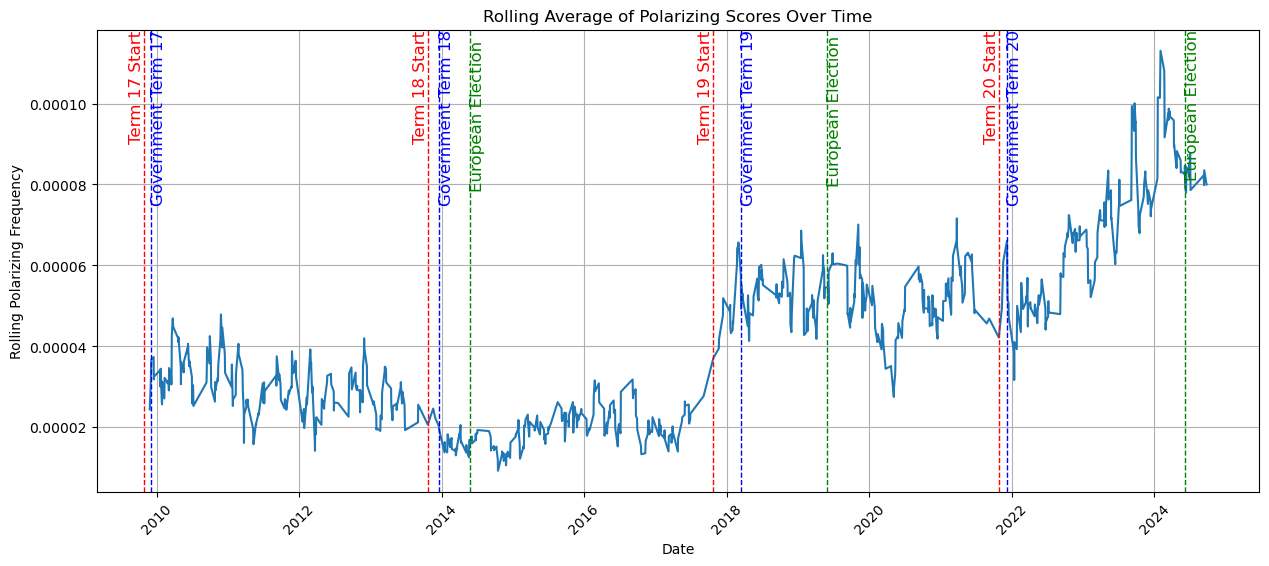

In [169]:
# Applying a 30-day rolling average for smoothing
daily_grouped['rolling_frequency_7'] = daily_grouped['frequency'].rolling(window=7, min_periods=7).mean()


# Dates for the start of each electoral term (example dates, replace with actual)
electoral_terms = {
    'Term 17 Start': '2009-10-27',
    'Term 18 Start': '2013-10-22',
    'Term 19 Start': '2017-10-24',
    'Term 20 Start': '2021-10-26'
}

new_government = {
    'Government Term 17': '2009-12-02',
    'Government Term 18': '2013-12-17',
    'Government Term 19': '2018-03-14',
    'Government Term 20': '2021-12-08'

}

european_elections ={
    'European Election': '2024-06-09',
    'European Election ': '2019-05-29',
    'European Election  ': '2014-05-25',
}

# Plotting
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x='date', y='rolling_frequency_7', data=daily_grouped)

# Add vertical lines for each electoral term start
for term, start_date in electoral_terms.items():
    start_date = pd.to_datetime(start_date)  # Convert string to datetime
    ax.axvline(start_date, color='red', linestyle='--', lw=1)
    ax.text(start_date, ax.get_ylim()[1], term, rotation=90, ha='right', va='top', color='red', fontsize=12)

# Add vertical lines for each electoral term start
for term, start_date in new_government.items():
    start_date = pd.to_datetime(start_date)  # Convert string to datetime
    ax.axvline(start_date, color='blue', linestyle='--', lw=1)
    ax.text(start_date, ax.get_ylim()[1], term, rotation=90, ha='left', va='top', color='blue', fontsize=12)

for term, start_date in european_elections.items():
    start_date = pd.to_datetime(start_date)  # Convert string to datetime
    ax.axvline(start_date, color='green', linestyle='--', lw=1)
    ax.text(start_date, ax.get_ylim()[1], term, rotation=90, ha='left', va='top', color='green', fontsize=12)


plt.title('Rolling Average of Polarizing Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Polarizing Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 6.1 Rate of change before elections

Calculation of the rate of change two month prior and post electoins

In [47]:

# Provided election dates
election_dates = pd.to_datetime(['2009-09-27', '2013-09-22', '2017-09-24', '2021-09-26'])

# Initialize an empty DataFrame for the results
results = []

# Iterate through each election date
for date in election_dates:
    # Calculate the date ranges for two months before and after the election
    pre_election_start = date - pd.DateOffset(months=2)
    post_election_end = date + pd.DateOffset(months=2)

    # Filter data for the two months before and after the election
    pre_election_data = final_df[(final_df['date'] >= pre_election_start) & (final_df['date'] < date)]
    post_election_data = final_df[(final_df['date'] > date) & (final_df['date'] <= post_election_end)]

    # Calculate the average frequency for each period
    pre_avg = pre_election_data['frequency'].mean()
    post_avg = post_election_data['frequency'].mean()

    # Calculate the percentage change
    if pre_avg != 0:  # Avoid division by zero
        percent_change = ((post_avg - pre_avg) / pre_avg) * 100
    else:
        percent_change = None  # Handle cases where pre_avg is zero

    # Append the results
    results.append({
        'Election Year': date.year,
        'Pre-Election Average Frequency': pre_avg,
        'Post-Election Average Frequency': post_avg,
        'Percentage Change': percent_change
    })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


   Election Year  Pre-Election Average Frequency  \
0           2009                             NaN   
1           2013                        0.000158   
2           2017                        0.000719   
3           2021                        0.000145   

   Post-Election Average Frequency  Percentage Change  
0                         0.000073                NaN  
1                         0.000142         -10.131938  
2                         0.000088         -87.812955  
3                         0.000459         216.144609  


## 6.2 Rate of change before new term

Changes two month post and prios new term

In [142]:
# Provided election dates
term_dates = pd.to_datetime(['2009-10-27','2013-10-22', '2017-10-24','2021-10-26'])

# Initialize an empty DataFrame for the results
results = []

# Iterate through each election date
for date in term_dates:
    # Calculate the date ranges for two months before and after the election
    pre_term_start = date - pd.DateOffset(months=2)
    post_term_end = date + pd.DateOffset(months=2)

    # Filter data for the two months before and after the election
    pre_term_data = final_df[(final_df['date'] >= pre_term_start) & (final_df['date'] < date)]
    post_term_data = final_df[(final_df['date'] > date) & (final_df['date'] <= post_term_end)]

    # Calculate the average frequency for each period
    pre_avg = pre_term_data['frequency'].mean()
    post_avg = post_term_data['frequency'].mean()

    # Calculate the percentage change
    if pre_avg != 0:  # Avoid division by zero
        percent_change = ((post_avg - pre_avg) / pre_avg) * 100
    else:
        percent_change = None  # Handle cases where pre_avg is zero

    # Append the results
    results.append({
        'Election Year': date.year,
        'Pre-Election Average Frequency': pre_avg,
        'Post-Election Average Frequency': post_avg,
        'Percentage Change': percent_change
    })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

   Election Year  Pre-Election Average Frequency  \
0           2009                             NaN   
1           2013                        0.000123   
2           2017                        0.000719   
3           2021                        0.000091   

   Post-Election Average Frequency  Percentage Change  
0                         0.000083                NaN  
1                         0.000051         -58.556137  
2                         0.000152         -78.835404  
3                         0.000374         312.738944  


# 8. Rate of change

In [158]:
# Assuming 'final_df' has the 'date' and 'frequency' fields and dates are properly formatted
final_df['date'] = pd.to_datetime(final_df['date'])

# Provided election dates, ensure they are all datetime objects
term_dates = pd.to_datetime(['2009-10-27', '2013-10-22', '2017-10-24', '2021-10-26'])

# If the last term is ongoing, add a hypothetical end date if not using 'today' directly
# Extend to include today's date as the end of the last term
term_dates = np.append(term_dates, pd.to_datetime('today'))

# Initialize a figure for plotting
plt.figure(figsize=(15, 8))

# Loop through each pair of dates to cover each term
for i in range(len(term_dates) - 1):
    start_date = term_dates[i]
    end_date = term_dates[i + 1]  # Use the next term date as the end date

    # Filter data for the current term
    term_data = final_df[(final_df['date'] >= start_date) & (final_df['date'] < end_date)]

    # Prepare data for regression
    term_data = term_data.dropna(subset=['frequency'])  # Ensure no NaN values
    term_data['days_from_start'] = (term_data['date'] - start_date).dt.days  # Days from start of term

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(term_data[['days_from_start']], term_data['frequency'])

    # Predict values for the trend line
    term_data['trend'] = model.predict(term_data[['days_from_start']])

    # Plotting the trend line
    plt.plot(term_data['date'], term_data['trend'], label=f'Trend {start_date.year} to {end_date.year}', linestyle='--')

# Plot the actual frequency values for context
plt.plot(final_df['date'], final_df['frequency'], label='Actual Frequency', color='grey', alpha=0.5)

# Plot details
plt.title('Trend Lines of Polarizing Frequency for Each Electoral Term Overlaid on Actual Values')
plt.xlabel('Date')
plt.ylabel('Polarizing Frequency')
plt.legend()
plt.grid(True)
plt.show()


TypeError: Invalid comparison between dtype=datetime64[ns] and int

<Figure size 1500x800 with 0 Axes>

# 7. KOMMT RAUS! Time series Analysis

## 7.1 Sesonal Decomposition

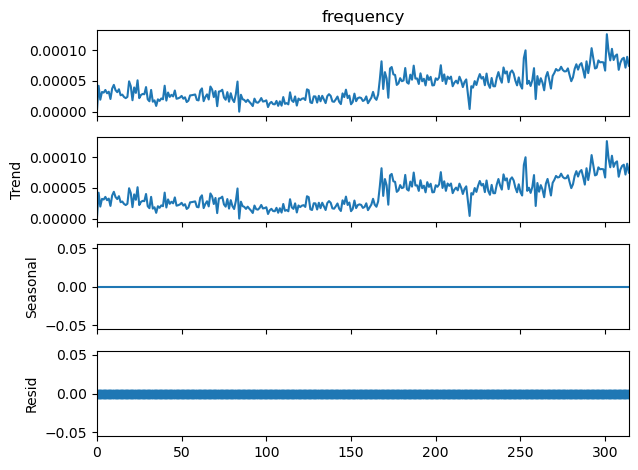

In [150]:
# Decompose the time series
result = seasonal_decompose(weekly_grouped['frequency'], model='additive', period=1)  # Assuming monthly data; adjust the period accordingly

# Plot the decomposed components
result.plot()
plt.show()

Empty DataFrame
Columns: [Year, Percentage Change]
Index: []


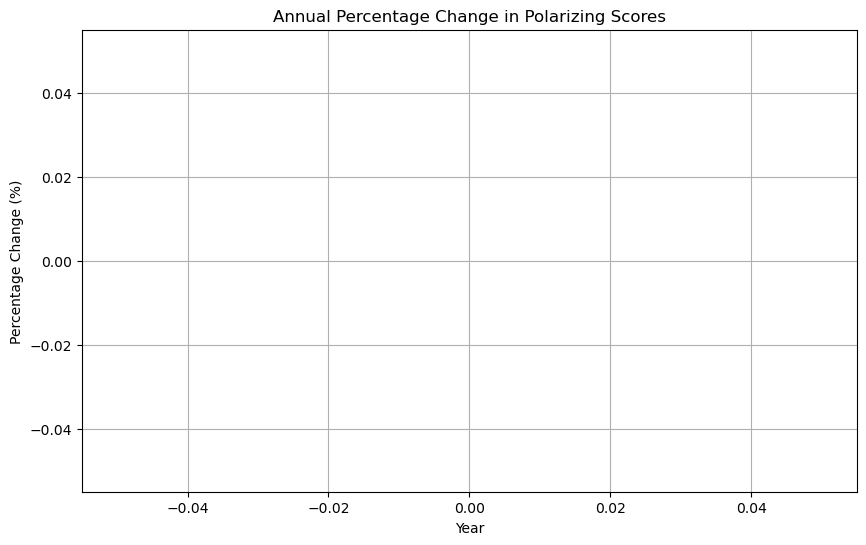

In [151]:
# Ensure the trend data is already prepared
trend_data = result.trend.dropna()  # Assuming result.trend is your trend component
trend_data.index = pd.to_datetime(trend_data.index)  # Ensure datetime index

# Initialize a DataFrame to hold the results
annual_percentage_changes = pd.DataFrame(columns=['Year', 'Percentage Change'])

# Calculate percentage changes for each year
for year in np.unique(trend_data.index.year):
    yearly_data = trend_data[trend_data.index.year == year]
    if not yearly_data.empty:
        start_value = yearly_data.iloc[0]  # First value of the year
        end_value = yearly_data.iloc[-1]   # Last value of the year

        # Calculate percentage change from start to end of the year
        if start_value != 0:  # Avoid division by zero
            percentage_change = ((end_value - start_value) / start_value) * 100
            annual_percentage_changes = annual_percentage_changes.append({
                'Year': year,
                'Percentage Change': percentage_change
            }, ignore_index=True)

# Display the results
print(annual_percentage_changes)

# Convert 'Year' to integer for plotting
annual_percentage_changes['Year'] = annual_percentage_changes['Year'].astype(int)

plt.figure(figsize=(10, 6))
plt.bar(annual_percentage_changes['Year'], annual_percentage_changes['Percentage Change'], color='skyblue')
plt.title('Annual Percentage Change in Polarizing Scores')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()

In [59]:
# Assuming the trend data has already been loaded and prepared
x = np.array(trend_data.index.to_julian_date())  # Convert dates to numerical format
y = trend_data.values

# Fit a linear regression to the entire dataset
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Convert slope to annual slope assuming the x-axis is in Julian dates (365.25 days per year)
annual_slope = slope * 365.25

# Display the annualized slope
print(f"Annualized Slope: {annual_slope:.5f}")
print(f"R-squared: {r_value**2:.5f}")
print(f"P-value: {p_value:.5f}")

Annualized Slope: 0.00000
R-squared: 0.64798
P-value: 0.00000


## 7.2 Fourier

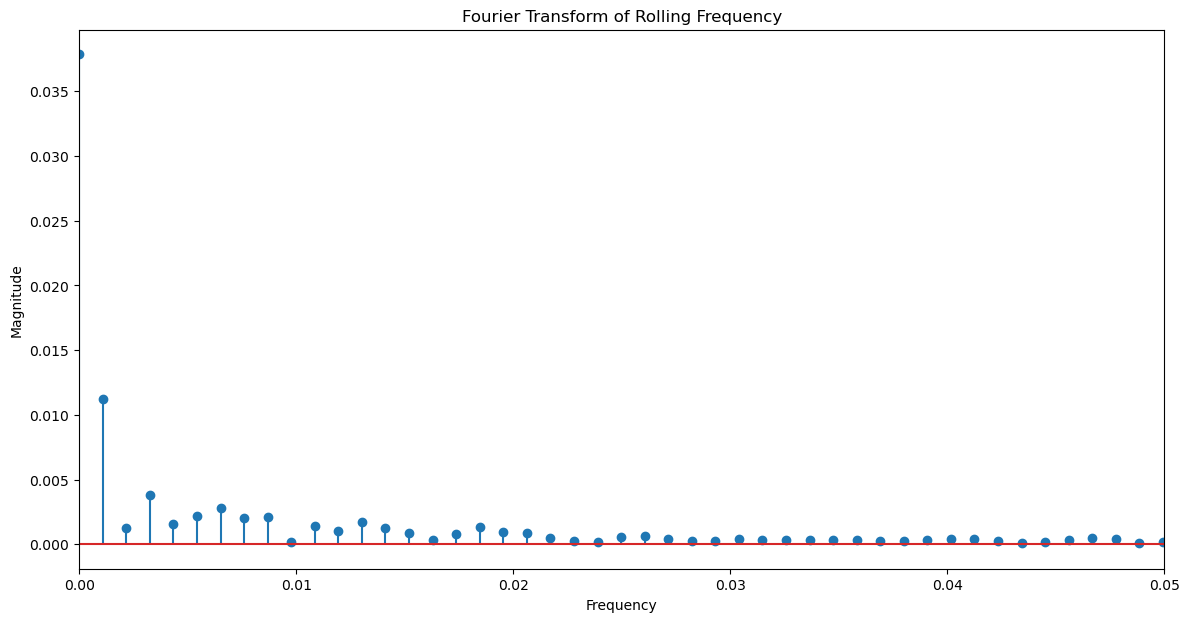

In [54]:
# Perform a Fourier transform
fft_result = np.fft.fft(daily_grouped['rolling_frequency'].dropna())

# Get frequencies and magnitudes
frequencies = np.fft.fftfreq(len(fft_result))
magnitudes = np.abs(fft_result)

# Plot the spectrum
plt.figure(figsize=(14, 7))
plt.stem(frequencies, magnitudes)
plt.title('Fourier Transform of Rolling Frequency')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim([0, 0.05])  # Adjust x-axis limits to focus on lower frequencies, which corresponds to longer cycles
plt.show()


No Clear Peaks at Expected Electoral Frequencies: If there are no distinct peaks at the frequencies corresponding to known electoral cycles (e.g., 4-year cycles would correspond to a frequency of about 0.25 if data were annual, less frequent if data points are monthly), it might suggest that electoral cycles do not have a strong or clear impact on the pattern of polarization observed in the data.

## 7.3 Auto correlation

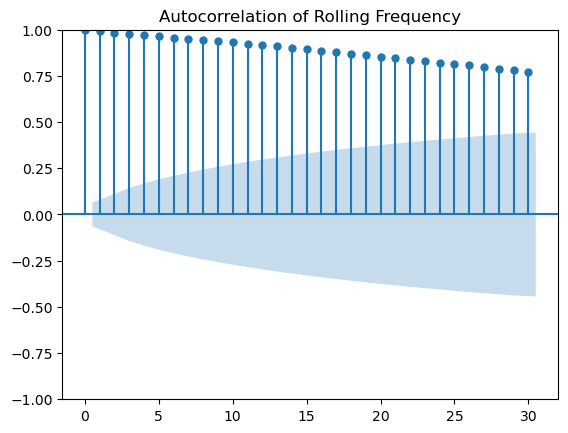

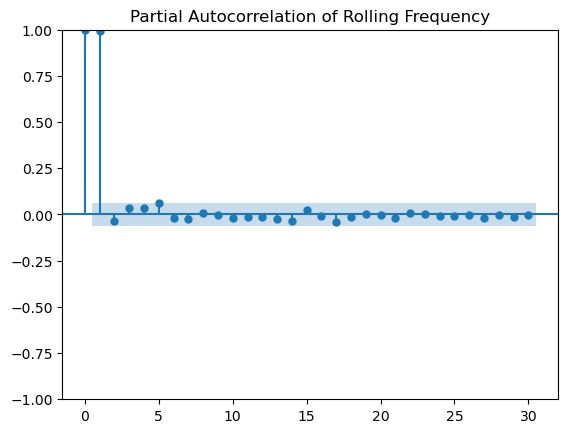

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation
plot_acf(daily_grouped['rolling_frequency'])
plt.title('Autocorrelation of Rolling Frequency')
plt.show()

# Plot partial autocorrelation
plot_pacf(daily_grouped['rolling_frequency'])
plt.title('Partial Autocorrelation of Rolling Frequency')
plt.show()


## 7.5 ARIMA and SARIMA

In [62]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Function to perform the Dickey-Fuller test to check for stationarity
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Assuming 'daily_grouped' has 'rolling_frequency' as your series
test_stationarity(daily_grouped['rolling_frequency'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -1.153225
p-value                          0.693387
#Lags Used                       0.000000
Number of Observations Used    920.000000
Critical Value (1%)             -3.437478
Critical Value (5%)             -2.864687
Critical Value (10%)            -2.568445
dtype: float64


In [63]:
# Differencing the series
daily_grouped['diff_rolling_frequency'] = daily_grouped['rolling_frequency'].diff()

# Drop any NaNs that resulted from differencing
daily_grouped.dropna(inplace=True)

# Check stationarity again with the Dickey-Fuller test
test_stationarity(daily_grouped['diff_rolling_frequency'])


Results of Dickey-Fuller Test:
Test Statistic                 -28.361344
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    919.000000
Critical Value (1%)             -3.437486
Critical Value (5%)             -2.864690
Critical Value (10%)            -2.568447
dtype: float64


In [64]:
# Seasonal differencing (assuming monthly data, so a 4-year cycle would be 48 months)
daily_grouped['seasonal_diff'] = daily_grouped['rolling_frequency'].diff(48)

# Drop any NaNs that resulted from differencing
daily_grouped.dropna(inplace=True)

# Check stationarity again
test_stationarity(daily_grouped['seasonal_diff'])


Results of Dickey-Fuller Test:
Test Statistic                  -5.081668
p-value                          0.000015
#Lags Used                      18.000000
Number of Observations Used    853.000000
Critical Value (1%)             -3.438039
Critical Value (5%)             -2.864934
Critical Value (10%)            -2.568577
dtype: float64


In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'rolling_frequency' is your series
# Ensure your series is stationary (difference if not already done)
daily_grouped['diff_rolling_frequency'] = daily_grouped['rolling_frequency'].diff().dropna()

# Fit the ARIMA model
model = SARIMAX(daily_grouped['diff_rolling_frequency'],
                order=(1, 0, 0),    # ARIMA(1,0,0)
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Print out the summary of the model
print(results.summary())


/Users/Silja/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Silja/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05520D+01    |proj g|=  6.81425D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   6.814D+04  -1.055D+01
  F =  -10.551995158688491     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/Silja/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                 SARIMAX Results                                  
Dep. Variable:     diff_rolling_frequency   No. Observations:                  872
Model:                   SARIMAX(1, 0, 0)   Log Likelihood                9201.340
Date:                    Sat, 23 Nov 2024   AIC                         -18398.680
Time:                            16:34:29   BIC                         -18389.140
Sample:                                 0   HQIC                        -18395.030
                                    - 872                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0153   2.22e-23   6.89e+20      0.000       0.015       0.015
sigma2          1e-10   6.73e-11      1.487      0.137   -3.18e-11    2.32e-10
Ljung-Box (L1) (Q): 